In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [40]:
raw = pd.read_csv(os.path.join('bag_covid_19_data_csv_02_décembre_2021/data', 'COVID19Death_vaccpersons.csv'))
#vote.rename(columns={1: 'Canton', 3:'Commune', 12: 'Oui'}, inplace=True)
#keep = ['Canton', 'Commune', 'Oui']
#vote=vote[keep]
raw

,date,vaccine,vaccination_status,entries,sumTotal,pop,inz_entries,inzsumTotal,mean7d,inzmean7d,prct,prctSumTotal,prct_mean7d,geoRegion,type,type_variant,data_completeness,version
0,2021-01-27,moderna,fully_vaccinated,0,0,128.0,0.00,NaN,NaN,NaN,0.00,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-02_07-48-44
1,2021-01-28,moderna,fully_vaccinated,0,0,179.0,0.00,NaN,NaN,NaN,0.00,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-02_07-48-44
2,2021-01-29,moderna,fully_vaccinated,0,0,187.0,0.00,NaN,NaN,NaN,0.00,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-02_07-48-44
3,2021-01-30,moderna,fully_vaccinated,0,0,187.0,0.00,NaN,0.0,0.0,0.00,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-02_07-48-44
4,2021-01-31,moderna,fully_vaccinated,0,0,187.0,0.00,NaN,0.0,0.0,NaN,0.00,NaN,CHFL,COVID19Death,vaccine,limited,2021-12-02_07-48-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,2021-11-30,all,unknown,2,749,NaN,NaN,NaN,NaN,NaN,12.50,35.35,NaN,CHFL,COVID19Death,vaccine,intermediate,2021-12-02_07-48-44
3086,2021-12-01,all,fully_vaccinated,2,304,5798893.0,0.03,NaN,NaN,NaN,28.57,14.30,NaN,CHFL,COVID19Death,vaccine,intermediate,2021-12-02_07-48-44
3087,2021-12-01,all,partially_vaccinated,1,82,146237.0,0.68,NaN,NaN,NaN,14.29,3.86,NaN,CHFL,COVID19Death,vaccine,intermediate,2021-12-02_07-48-44
3088,2021-12-01,all,not_vaccinated,4,991,2764225.0,0.14,NaN,NaN,NaN,57.14,46.61,NaN,CHFL,COVID19Death,vaccine,intermediate,2021-12-02_07-48-44


In [42]:
deaths = raw.loc[(raw['vaccine']=='all') &
           (raw['data_completeness']=='intermediate') &
           ((raw['vaccination_status']=='fully_vaccinated') |
           (raw['vaccination_status']=='not_vaccinated'))
           ,
           ('date', 'vaccination_status', 'mean7d')]
deaths

,date,vaccination_status,mean7d
2462,2021-06-28,fully_vaccinated,0.14
2464,2021-06-28,not_vaccinated,0.14
2466,2021-06-29,fully_vaccinated,0.00
2468,2021-06-29,not_vaccinated,0.29
2470,2021-06-30,fully_vaccinated,0.00
...,...,...,...
3080,2021-11-29,not_vaccinated,NaN
3082,2021-11-30,fully_vaccinated,NaN
3084,2021-11-30,not_vaccinated,NaN
3086,2021-12-01,fully_vaccinated,NaN


In [43]:
deaths.isna().sum()

date                  0
vaccination_status    0
mean7d                6
dtype: int64

In [44]:
deaths.dropna(how='any', inplace=True)
deaths

,date,vaccination_status,mean7d
2462,2021-06-28,fully_vaccinated,0.14
2464,2021-06-28,not_vaccinated,0.14
2466,2021-06-29,fully_vaccinated,0.00
2468,2021-06-29,not_vaccinated,0.29
2470,2021-06-30,fully_vaccinated,0.00
...,...,...,...
3068,2021-11-26,not_vaccinated,5.14
3070,2021-11-27,fully_vaccinated,6.43
3072,2021-11-27,not_vaccinated,5.43
3074,2021-11-28,fully_vaccinated,5.29


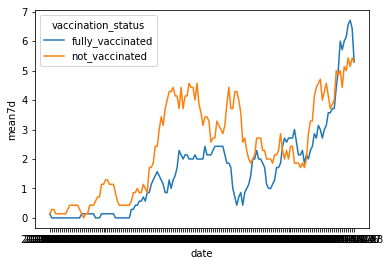

In [50]:
sns.lineplot(data=deaths, x='date', y='mean7d', hue='vaccination_status')
plt.show()

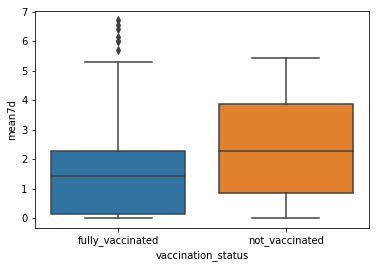

In [59]:
sns.boxplot(data=deaths, y='mean7d', x='vaccination_status')
plt.show()

In [60]:
deaths.groupby('vaccination_status').mean()

,mean7d
vaccination_status,
fully_vaccinated,1.613636
not_vaccinated,2.425844
